# Multichannel audio source separation by FastMNMF

In [1]:
import numpy as np
import scipy.signal as ss
import soundfile as sf
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt
from scipy.io import wavfile

In [2]:
from mnmf import FastMNMF
from plotting import plot_sounds_spectrogram, plot_sounds_waveform, plot_components

## 1\. Source separation

### Target sources

In [3]:
part1, sr = sf.read("../AudioData/sounds_mixedX.wav")
part2, sr = sf.read("../AudioData/sounds_mixedY.wav")

x = np.vstack([part1, part2])

n_channels, T = x.shape
n_sources = n_channels

In [4]:
for idx in range(n_channels):
    display(ipd.Audio(x[idx], rate=sr))

In [5]:
fft_size, hop_size = 4096, 2048
NUM_ITER = 20

In [6]:
_, _, X = ss.stft(x, nperseg=fft_size, noverlap=fft_size-hop_size)

In [7]:
mnmf = FastMNMF(n_basis=2)

In [8]:
Y = mnmf(X, iteration=NUM_ITER)

In [9]:
_, y = ss.istft(Y, nperseg=fft_size, noverlap=fft_size-hop_size)
y = y[:, :T]

### Separated sources

In [10]:
for idx in range(n_sources):
    display(ipd.Audio(y[idx], rate=sr))
    wavfile.write(f"../results/NMFspeach_part_{idx}_iter_{NUM_ITER}.wav", sr, (32767*y[idx]).astype(np.int16))

In [11]:
def plot_sounds_spectrogram(audio_sound, sr):
    fig, ax = plt.subplots(figsize=(10, 3))
    X = librosa.stft(audio_sound)
    Xdb = librosa.amplitude_to_db(abs(X))
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz', ax=ax)
    ax.set(title='The sound spectrogram', xlabel='Time [s]', ylabel='Frequency [Hz]')
    ax.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


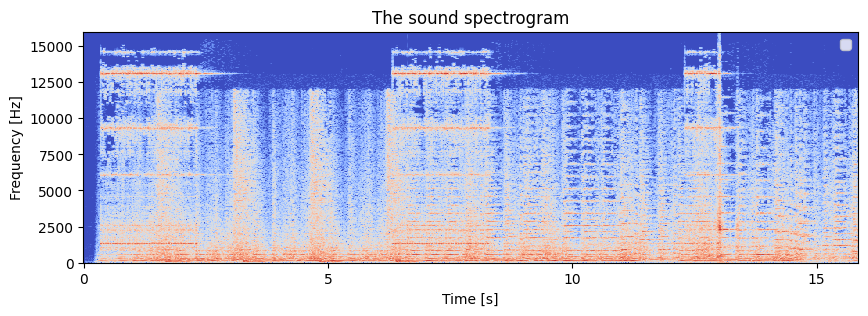

In [12]:
plot_sounds_spectrogram(*sf.read("../AudioData/sounds_mixedX.wav"))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


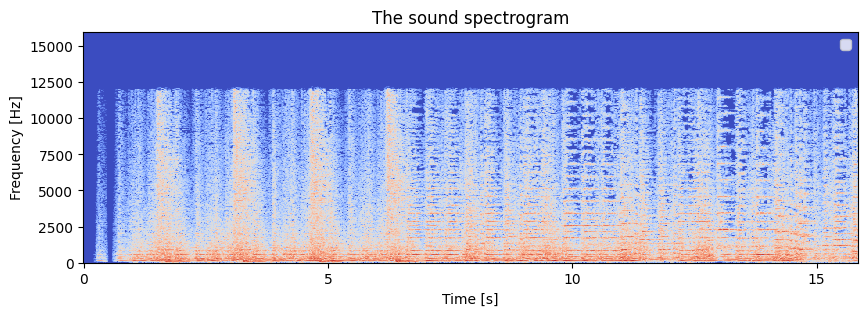

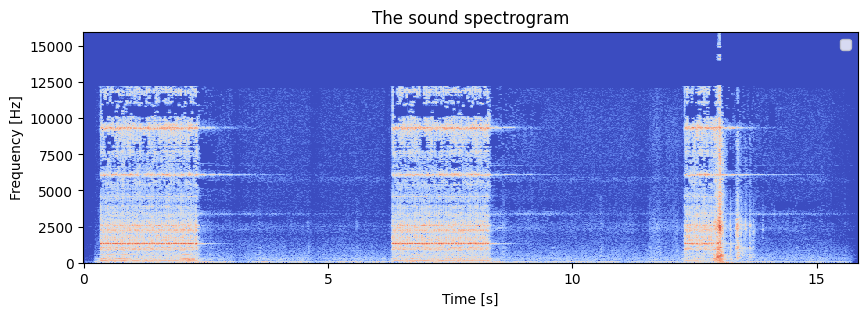

In [13]:
for idx in range(n_sources):
    plot_sounds_spectrogram(*sf.read(f"../results/NMFspeach_part_{idx}_iter_100.wav"))

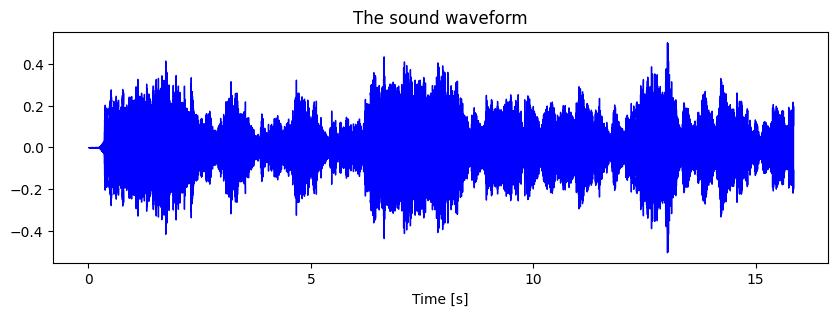

In [15]:
plot_sounds_waveform(*sf.read("../AudioData/sounds_mixedX.wav"))

/home/sviat/code/la/Project/AudioSourceSeparation/NMF/plotting.py:23: FutureWarning: waveshow() keyword argument 'x_axis' has been renamed to 'axis' in version 0.10.0.
	This alias will be removed in version 1.0.
  librosa.display.waveshow(reconstructed_sounds[i], sr=sr, color=colors[i], ax=ax[i], label=f'Source {i}',


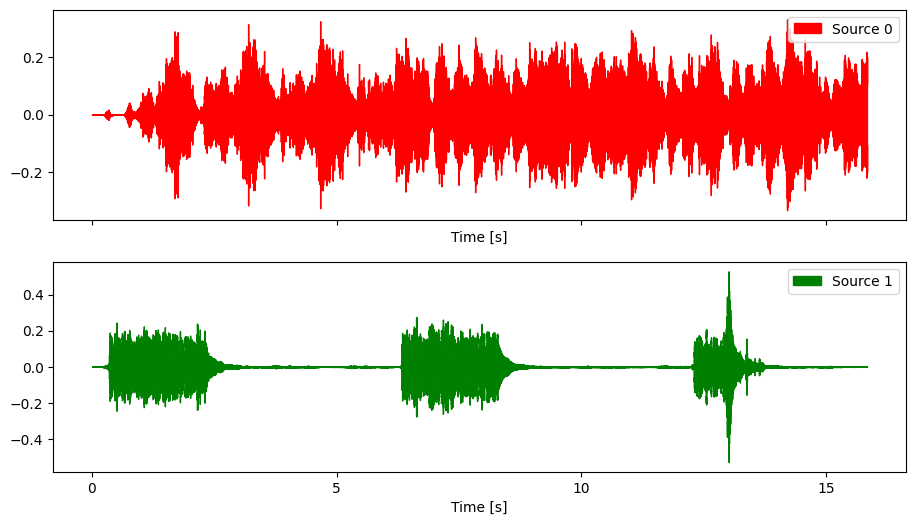

In [16]:
plot_components(y, sr)